In [371]:
import numpy as np
import matplotlib 
import matplotlib as mpl
import fitsio
import os, glob
from astropy.table import Table, join, unique, hstack
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.gaia import Gaia

%pylab inline --no-import-all

matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'

colours = mpl.rcParams['axes.color_cycle'] 


Populating the interactive namespace from numpy and matplotlib


In [396]:
# ls ../data

In [373]:
tab = Table.read('../data/wrs_all_match.csv')

In [376]:
tab.write('../data/wrs_all_match.vot',format='votable',overwrite=True)

In [377]:
dists = Table.read('../data/wrs_dists.csv')

In [378]:
catalog = Table.read('../data/wrs.csv')

In [379]:
good_dists = unique(dists,keys='source_id')
all_gaia = join(tab,good_dists,join_type='outer',keys='source_id')

In [380]:
wrs = hstack([catalog,all_gaia])

In [381]:
def abs_mag(app_mag,dist):
    return app_mag - 5.*(np.log10(dist) - 1.)

In [382]:
for band in ['bp','g','rp']:
    wrs['abs_%s' % band.capitalize()] = abs_mag(wrs['phot_%s_mean_mag' % band],wrs['r_est'])
    wrs['abs_%s_hi' % band.capitalize()] = abs_mag(wrs['phot_%s_mean_mag' % band],wrs['r_hi'])
    wrs['abs_%s_lo' % band.capitalize()] = abs_mag(wrs['phot_%s_mean_mag' % band],wrs['r_lo'])

for band in ['J','H','K']:
    wrs['abs_%s' % band] = abs_mag(wrs[band],wrs['r_est'])
    wrs['abs_%s_hi' % band] = abs_mag(wrs[band],wrs['r_hi'])
    wrs['abs_%s_lo' % band] = abs_mag(wrs[band],wrs['r_lo'])

/Users/benjaminpope/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [383]:
wrs.write('wr_gaia_catalog.csv')

### Let's look at what the WR catalog has for us!

First, let's look in the visible.

In [384]:
errorbars = np.zeros((2,np.size(wrs['abs_G'])))
errorbars[0,:] = wrs['abs_G_hi']-wrs['abs_G']
errorbars[1,:] = wrs['abs_G']-wrs['abs_G_lo']

(1.5281029, 5.502740513376736)
(2.060686, 8.566511763754562)
(3.4068642, 6.770862339966678)


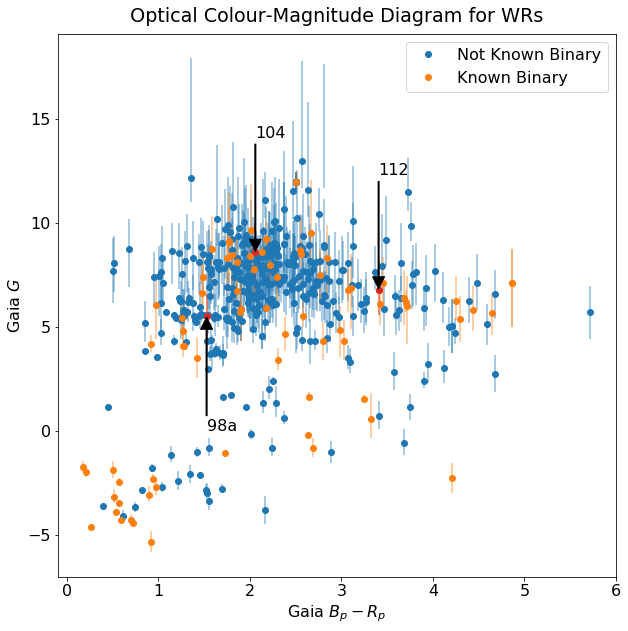

In [448]:
plt.plot(wrs['bp_rp'][~binary],wrs['abs_G'][~binary],'.',markersize=12,label='Not Known Binary')
plt.errorbar(wrs['bp_rp'][~binary],wrs['abs_G'][~binary],yerr=errorbars[:,~binary],fmt=None,alpha=0.5,color=colours[0])

plt.plot(wrs['bp_rp'][binary],wrs['abs_G'][binary],'.',markersize=12,label='Known Binary')
plt.errorbar(wrs['bp_rp'][binary],wrs['abs_G'][binary],yerr=errorbars[:,binary],fmt=None,alpha=0.5,color=colours[1])
plt.legend(['Not Known Binary','Known Binary'])

indices = [np.where(wrs['WR#']==name)[0][0] for name in ['98a','104', '112']]
plt.plot(wrs['bp_rp'][indices],wrs['abs_G'][indices],'.',markersize=12,color=colours[3],label='CWBs')
plt.errorbar(wrs['bp_rp'][indices],wrs['abs_G'][indices],yerr=errorbars_J[:,indices],fmt=None,alpha=0.5,color=colours[3])

offsets = [-5.5,5.5,5.5]
for j, name in enumerate(['98a','104', '112']):
    xy = (wrs['bp_rp'][indices[j]], wrs['abs_G'][indices[j]])
    print xy
    plt.annotate(name, xy=xy, 
                 xytext=(xy[0], xy[1]+offsets[j]),arrowprops=dict(facecolor='black', shrink=0.01,width=1),)


plt.xlabel(r'Gaia $B_p-R_p$')
plt.ylabel(r'Gaia $G$')
plt.title('Optical Colour-Magnitude Diagram for WRs',y=1.01)
plt.savefig('gaia_wr_cmd.png')

Now, let's look in the near infrared.

In [389]:
errorbars_J = np.zeros((2,np.size(wrs['abs_J'])))
errorbars_J[0,:] = wrs['abs_J_hi']-wrs['abs_J']
errorbars_J[1,:] = wrs['abs_J']-wrs['abs_J_lo']

(4.91, -4.493623486623264)
(4.35, -5.567350236245437)
(4.52, -3.4382446600333214)


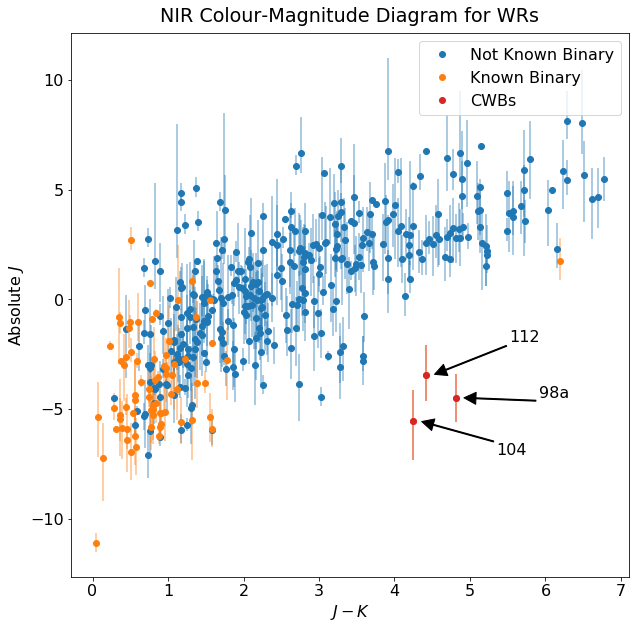

In [439]:
plt.plot((wrs['J']-wrs['K'])[~binary],wrs['abs_J'][~binary],'.',markersize=12,color=colours[0],label='Not Known Binary')
plt.errorbar((wrs['J']-wrs['K'])[~binary],wrs['abs_J'][~binary],yerr=errorbars_J[:,~binary],fmt=None,alpha=0.5,color=colours[0])

plt.plot((wrs['J']-wrs['K'])[binary],wrs['abs_J'][binary],'.',markersize=12,color=colours[1],label='Known Binary')
plt.errorbar((wrs['J']-wrs['K'])[binary],wrs['abs_J'][binary],yerr=errorbars_J[:,binary],fmt=None,alpha=0.5,color=colours[1])


indices = [np.where(wrs['WR#']==name)[0][0] for name in ['98a','104', '112']]
plt.plot((wrs['J']-wrs['K'])[indices],wrs['abs_J'][indices],'.',markersize=12,color=colours[3],label='CWBs')
plt.errorbar((wrs['J']-wrs['K'])[indices],wrs['abs_J'][indices],yerr=errorbars_J[:,indices],fmt=None,alpha=0.5,color=colours[3])

offsets = [0,-1.5,1.5]
for j, name in enumerate(['98a','104', '112']):
    xy = ((wrs['J']-wrs['K'])[indices[j]]+0.1, wrs['abs_J'][indices[j]])
    print xy
    plt.annotate(name, xy=xy, 
                 xytext=(xy[0]+1, xy[1]+offsets[j]),arrowprops=dict(facecolor='black', shrink=0.01,width=1),)

plt.legend(['Not Known Binary','Known Binary','CWBs'])

plt.xlabel(r'$J-K$')
plt.ylabel(r'Absolute $J$')
plt.title('NIR Colour-Magnitude Diagram for WRs',y=1.01)
plt.savefig('gaia_wr_nir_cmd.png')

In [407]:
for name in ['98a','104', '112']:
    print np.where(wrs['WR#']==name)[0][0]


338
459
490


In [399]:
wrs[binary*(wrs['J']-wrs['K'] > 4)]

#id,WR#,Reference,Name,Name 2,Name 3,Right Ascension J2000,Declination J2000,Galactic Longitude (deg),Galactic Latitude (deg),Spectral Type,Spectral Type Reference,Binary Status,Binary Status Reference,u,b_1,v,r,U,B,V,R,I,J,H,K,Cluster,Association,Distance (kpc),Distance Reference,input_position,distance,source_id,designation,ra,dec,l,b_2,ecl_lon,ecl_lat,parallax,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ra_error,dec_error,parallax_error,pmra_error,pmdec_error,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_pseudo_colour,astrometric_pseudo_colour_error,astrometric_sigma5d_max,astrometric_weight_al,bp_g,bp_rp,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,duplicated_source,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,e_bp_min_rp_val,flame_flags,frame_rotator_object_type,g_rp,lum_percentile_lower,lum_percentile_upper,lum_val,matched_observations,mean_varpi_factor_al,parallax_over_error,parallax_pmdec_corr,parallax_pmra_corr,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_n_obs,phot_bp_rp_excess_factor,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_n_obs,phot_proc_mode,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_n_obs,phot_variable_flag,pmra_pmdec_corr,priam_flags,ra_dec_corr,radial_velocity,radial_velocity_error,radius_percentile_lower,radius_percentile_upper,radius_val,random_index,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,ref_epoch,rv_nb_transits,rv_template_fe_h,rv_template_logg,rv_template_teff,solution_id,teff_percentile_lower,teff_percentile_upper,teff_val,visibility_periods_used,other_ids,r_est,r_lo,r_hi,abs_Bp,abs_Bp_hi,abs_Bp_lo,abs_G,abs_G_hi,abs_G_lo,abs_Rp,abs_Rp_hi,abs_Rp_lo,abs_J,abs_J_hi,abs_J_lo,abs_H,abs_H_hi,abs_H_lo,abs_K,abs_K_hi,abs_K_lo
int64,str10,str12,str32,str25,str25,str12,str12,float64,float64,str28,str18,str19,str50,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,str18,str13,float64,str5,str38,float64,int64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,str13,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
228,98a,VII,--,--,IRAS 17380-3031,17 41 12.90,-30 32 29.00,358.13,-0.03,WC8-9vd+?,CH91,CWB,"WC95,Mo99,MT99,TMD02,Wi02",--,19.7,19.7,--,--,--,--,--,--,9.14,6.51,4.33,--,--,--,--,"162.77504166666668,-61.716166666666666",0.0008893319722609794,5241974118409659136,Gaia DR2 5241974118409659136,162.77673305966027,-61.71578120273375,289.1825775043916,-2.0992241736133885,206.0830675401549,-59.74045678321457,-0.18713331653507795,-5.169920345244163,2.3656288319247865,19.136364,19.685461,18.157358,0.21913385480292355,0.2217261755371607,0.2719528345009651,0.47990519592135705,0.42878783420335487,--,--,--,282.66092,0.8516659533440362,1.8119586211999135,3.6060648,24,0,207,0,207,31,false,1.4261235116894835,0.06358094019493463,0.44635633,0.20778674,0.54909706,1.5281029,0.06221848,-0.034392036,0.019913321,false,-

### How bad is the astrometry?

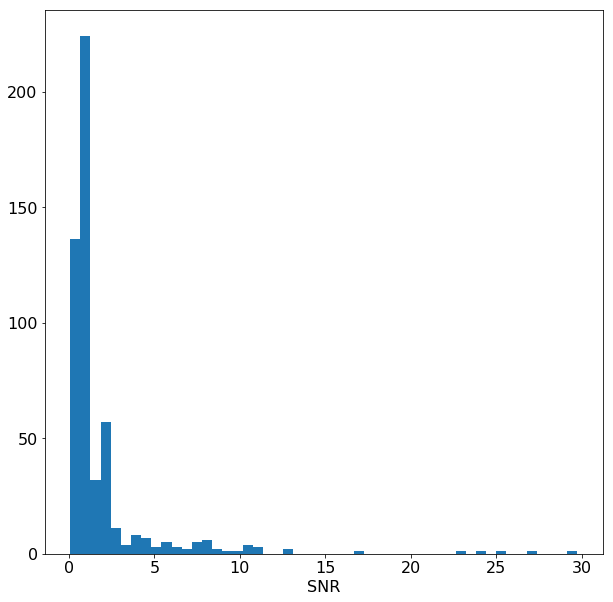

In [393]:
snrs = wrs['r_est']/(wrs['r_hi']-wrs['r_lo'])
h = plt.hist(snrs,bins=50)
plt.xlabel('SNR');

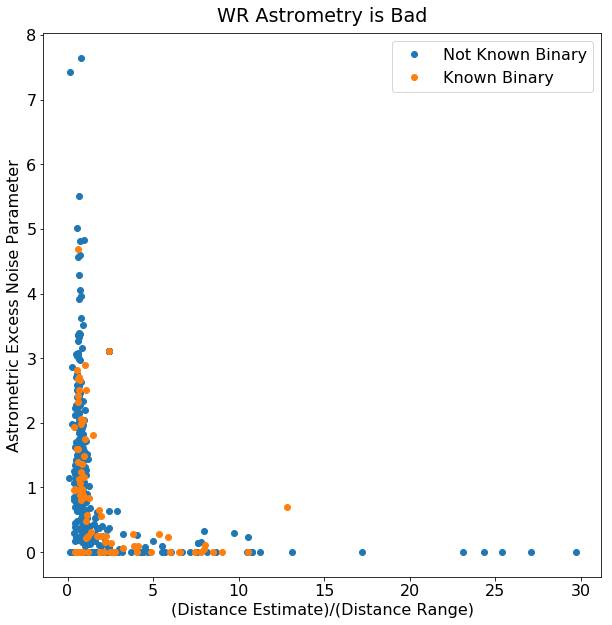

In [391]:
plt.plot(snrs[~binary],wrs['astrometric_excess_noise'][~binary],'.',markersize=12,label='Not Known Binary')
plt.plot(snrs[binary],wrs['astrometric_excess_noise'][binary],'.',markersize=12,label='Known Binary')

plt.xlabel('(Distance Estimate)/(Distance Range)')
plt.ylabel('Astrometric Excess Noise Parameter')
plt.title('WR Astrometry is Bad',y=1.01)
plt.legend()
plt.savefig('bad_astrometry.png')

### Which WRs have good SNR?

In [394]:
m = ~np.ma.getmask(snrs)*(snrs>10)
m.sum()

15

In [395]:
wrs[m]['WR#']

7a
20b
24
31c
47
47-1
47-2
70a
76-11
81
84-4
